# Projeto III - Computação Centífica II
### Solução do Problema Planar de Bratu
> Autor: Gil Miranda<br>
> Contato: gil.neto@ufrj.br<br>
> Repo: [@mirandagil](https://github.com/mirandagil)<br>

## Dependências e bibliotecas externas

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

---
## Da solução Analítica

Vamos aqui programar as funções que retornam a solução analítica do problema

In [226]:
def analytical_bratu(x, l):
    b_1 = 0
    b_2 = 16
    if l >= 1.5:
        b_2 = 8
    elif l > 1:
        b_2 = 10
    z = optimize.fixed_point(solve_z, [b_1, b_2], args=(l,0))
    if z[0] != z[1]:
        tu_1 = np.cosh((x-1/2)*z[0]/2)/np.cosh(z[0]/4)
        bra_1 = -2*np.log(tu_1)
        tu_2 = np.cosh((x-1/2)*z[1]/2)/np.cosh(z[1]/4)
        bra_2 = -2*np.log(tu_2)
        bratu = [bra_1, bra_2]
    else:
        tu = np.cosh((x-1/2)*z[0]/2)/np.cosh(z[0]/4)
        bra = -2*np.log(tu)
        bratu = bra
    return bratu

def solve_z(z, l, l1 = 0):
    return np.sqrt(2*l)*np.cosh(z/4)

def lambda_c(l):
    a = optimize.fixed_point(alpha, 5)
    return 8*(a**2 -1)

def alpha(x):
    return 1/np.tanh(x)


### Plotando a solução
Vamos fazer um plot da solução para $\lambda = 2.5$

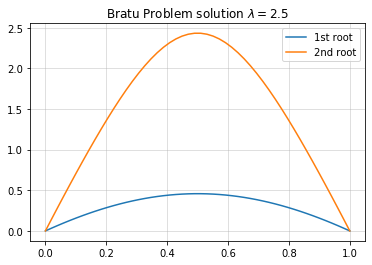

In [243]:
ls = np.linspace(0, lambda_c(0))
xs = np.linspace(0,1)
ys = [analytical_bratu(xs, l) for l in ls]

## plotting time
plt.plot(xs, phi[0], label = "1st root")
plt.plot(xs, phi[1], label = "2nd root")
plt.grid(alpha = 0.5)
plt.legend()
plt.title('Bratu Problem solution $\lambda = 2.5$')
plt.show()

ValueError: setting an array element with a sequence.

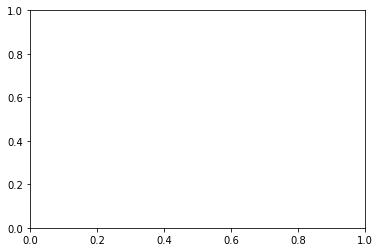

In [259]:
plt.plot(ls, ys)

Agora temos como comparar a solução analítica com a númerica e verificar o erro do metódo.

---
## Da solução Númerica #1

In [221]:
z = optimize.fixed_point(solve_z, [0,16], args=(0.93,0))
z

array([ 1.45504991, 11.16901531])

In [148]:
def fixedp(f,x0, l, tol=10e-5,maxiter=100):
    e = 1
    itr = 0
    xp = []
    while(e > tol and itr < maxiter):
        x = f(x0, l)      # fixed point equation
        e = abs(x0-x) # error at the current step
        x0 = x
        xp.append(x0)  # save the solution of the current step
        itr = itr + 1
    return x,xp

In [157]:
fixedp(solve_z, 14, 1)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in cosh
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


(inf,
 [23.437513416640684, 247.84731805066946, 5.7433548287776557e+26, inf, inf])